In [1]:
!python --version

Python 3.10.12


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import json
import joblib
import gc

pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("data_after_aggregates_v2.csv")
data.shape

<ipython-input-3-c5f600792c09>:1: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data_after_aggregates_v2.csv")


(786363, 163)

In [4]:
data.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch,CVVMismatch,isOverspent,daysSinceLastAddressChange,daysSinceAccountOpen,recency_by_customerId,age_by_customerId,count_by_customerId,sum_by_customerId,avg_by_customerId,recency_by_creditLimit,age_by_creditLimit,count_by_creditLimit,sum_by_creditLimit,avg_by_creditLimit,recency_by_merchantName,age_by_merchantName,count_by_merchantName,sum_by_merchantName,avg_by_merchantName,recency_by_acqCountry,age_by_acqCountry,count_by_acqCountry,sum_by_acqCountry,avg_by_acqCountry,recency_by_merchantCountryCode,age_by_merchantCountryCode,count_by_merchantCountryCode,sum_by_merchantCountryCode,avg_by_merchantCountryCode,recency_by_posEntryMode,age_by_posEntryMode,count_by_posEntryMode,sum_by_posEntryMode,avg_by_posEntryMode,recency_by_posConditionCode,age_by_posConditionCode,count_by_posConditionCode,sum_by_posConditionCode,avg_by_posConditionCode,recency_by_merchantCategoryCode,age_by_merchantCategoryCode,count_by_merchantCategoryCode,sum_by_merchantCategoryCode,avg_by_merchantCategoryCode,recency_by_currentExpDate,age_by_currentExpDate,count_by_currentExpDate,sum_by_currentExpDate,avg_by_currentExpDate,recency_by_cardCVV,age_by_cardCVV,count_by_cardCVV,sum_by_cardCVV,avg_by_cardCVV,recency_by_enteredCVV,age_by_enteredCVV,count_by_enteredCVV,sum_by_enteredCVV,avg_by_enteredCVV,recency_by_cardLast4Digits,age_by_cardLast4Digits,count_by_cardLast4Digits,sum_by_cardLast4Digits,avg_by_cardLast4Digits,recency_by_transactionType,age_by_transactionType,count_by_transactionType,sum_by_transactionType,avg_by_transactionType,recency_by_cardPresent,age_by_cardPresent,count_by_cardPresent,sum_by_cardPresent,avg_by_cardPresent,recency_by_expirationDateKeyInMatch,age_by_expirationDateKeyInMatch,count_by_expirationDateKeyInMatch,sum_by_expirationDateKeyInMatch,avg_by_expirationDateKeyInMatch,recency_by_customerId_creditLimit,age_by_customerId_creditLimit,count_by_customerId_creditLimit,sum_by_customerId_creditLimit,avg_by_customerId_creditLimit,recency_by_customerId_merchantName,age_by_customerId_merchantName,count_by_customerId_merchantName,sum_by_customerId_merchantName,avg_by_customerId_merchantName,recency_by_customerId_acqCountry,age_by_customerId_acqCountry,count_by_customerId_acqCountry,sum_by_customerId_acqCountry,avg_by_customerId_acqCountry,recency_by_customerId_merchantCountryCode,age_by_customerId_merchantCountryCode,count_by_customerId_merchantCountryCode,sum_by_customerId_merchantCountryCode,avg_by_customerId_merchantCountryCode,recency_by_customerId_posEntryMode,age_by_customerId_posEntryMode,count_by_customerId_posEntryMode,sum_by_customerId_posEntryMode,avg_by_customerId_posEntryMode,recency_by_customerId_posConditionCode,age_by_customerId_posConditionCode,count_by_customerId_posConditionCode,sum_by_customerId_posConditionCode,avg_by_customerId_posConditionCode,recency_by_customerId_merchantCategoryCode,age_by_customerId_merchantCategoryCode,count_by_customerId_merchantCategoryCode,sum_by_customerId_merchantCategoryCode,avg_by_customerId_merchantCategoryCode,recency_by_customerId_currentExpDate,age_by_customerId_currentExpDate,count_by_customerId_currentExpDate,sum_by_customerId_currentExpDate,avg_by_customerId_currentExpDate,recency_by_customerId_cardCVV,age_by_customerId_cardCVV,count_by_customerId_cardCVV,sum_by_customerId_cardCVV,avg_by_customerId_cardCVV,recency_by_customerId_enteredCVV,age_by_customerId_enteredCVV,count_by_customerId_enteredCVV,sum_by_customerId_enteredCVV,avg_by_customerId_enteredCVV,recency_by_customerId_cardLast4Digits,age_by_customerId_cardLast4Digits,count_by_customerId_cardLast4Digits,sum_by_customerId_cardLast4Digits,avg_by_customerId_cardLast4Digi

In [5]:
cat_features = joblib.load("cat_features.joblib")
len(cat_features)

15

In [6]:
cat_features

['customerId',
 'creditLimit',
 'merchantName',
 'acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'currentExpDate',
 'cardCVV',
 'enteredCVV',
 'cardLast4Digits',
 'transactionType',
 'cardPresent',
 'expirationDateKeyInMatch']

In [7]:
features_basic = joblib.load("features_basic.joblib")
cols_agg_acct = joblib.load("cols_agg_acct_v2.jobblib")
cols_agg_glb = joblib.load("cols_agg_glb.joblib")
cols_agg_glb = [c for c in cols_agg_glb if not ("cardPresent" in c or "expirationDateKeyInMatch" in c)]
len(features_basic), len(cols_agg_acct), len(cols_agg_glb)

(23, 65, 60)

In [8]:
features_basic

['customerId',
 'creditLimit',
 'availableMoney',
 'transactionAmount',
 'merchantName',
 'acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'currentExpDate',
 'cardCVV',
 'enteredCVV',
 'cardLast4Digits',
 'transactionType',
 'currentBalance',
 'cardPresent',
 'expirationDateKeyInMatch',
 'daysSinceLastAddressChange',
 'daysSinceAccountOpen',
 'countryMismatch',
 'CVVMismatch',
 'isOverspent']

In [9]:
features = features_basic + cols_agg_acct + cols_agg_glb
len(features)

148

In [10]:
data[data.duplicated(subset=["transactionDateTime", "customerId", "currentBalance"], keep=False)]

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch,CVVMismatch,isOverspent,daysSinceLastAddressChange,daysSinceAccountOpen,recency_by_customerId,age_by_customerId,count_by_customerId,sum_by_customerId,avg_by_customerId,recency_by_creditLimit,age_by_creditLimit,count_by_creditLimit,sum_by_creditLimit,avg_by_creditLimit,recency_by_merchantName,age_by_merchantName,count_by_merchantName,sum_by_merchantName,avg_by_merchantName,recency_by_acqCountry,age_by_acqCountry,count_by_acqCountry,sum_by_acqCountry,avg_by_acqCountry,recency_by_merchantCountryCode,age_by_merchantCountryCode,count_by_merchantCountryCode,sum_by_merchantCountryCode,avg_by_merchantCountryCode,recency_by_posEntryMode,age_by_posEntryMode,count_by_posEntryMode,sum_by_posEntryMode,avg_by_posEntryMode,recency_by_posConditionCode,age_by_posConditionCode,count_by_posConditionCode,sum_by_posConditionCode,avg_by_posConditionCode,recency_by_merchantCategoryCode,age_by_merchantCategoryCode,count_by_merchantCategoryCode,sum_by_merchantCategoryCode,avg_by_merchantCategoryCode,recency_by_currentExpDate,age_by_currentExpDate,count_by_currentExpDate,sum_by_currentExpDate,avg_by_currentExpDate,recency_by_cardCVV,age_by_cardCVV,count_by_cardCVV,sum_by_cardCVV,avg_by_cardCVV,recency_by_enteredCVV,age_by_enteredCVV,count_by_enteredCVV,sum_by_enteredCVV,avg_by_enteredCVV,recency_by_cardLast4Digits,age_by_cardLast4Digits,count_by_cardLast4Digits,sum_by_cardLast4Digits,avg_by_cardLast4Digits,recency_by_transactionType,age_by_transactionType,count_by_transactionType,sum_by_transactionType,avg_by_transactionType,recency_by_cardPresent,age_by_cardPresent,count_by_cardPresent,sum_by_cardPresent,avg_by_cardPresent,recency_by_expirationDateKeyInMatch,age_by_expirationDateKeyInMatch,count_by_expirationDateKeyInMatch,sum_by_expirationDateKeyInMatch,avg_by_expirationDateKeyInMatch,recency_by_customerId_creditLimit,age_by_customerId_creditLimit,count_by_customerId_creditLimit,sum_by_customerId_creditLimit,avg_by_customerId_creditLimit,recency_by_customerId_merchantName,age_by_customerId_merchantName,count_by_customerId_merchantName,sum_by_customerId_merchantName,avg_by_customerId_merchantName,recency_by_customerId_acqCountry,age_by_customerId_acqCountry,count_by_customerId_acqCountry,sum_by_customerId_acqCountry,avg_by_customerId_acqCountry,recency_by_customerId_merchantCountryCode,age_by_customerId_merchantCountryCode,count_by_customerId_merchantCountryCode,sum_by_customerId_merchantCountryCode,avg_by_customerId_merchantCountryCode,recency_by_customerId_posEntryMode,age_by_customerId_posEntryMode,count_by_customerId_posEntryMode,sum_by_customerId_posEntryMode,avg_by_customerId_posEntryMode,recency_by_customerId_posConditionCode,age_by_customerId_posConditionCode,count_by_customerId_posConditionCode,sum_by_customerId_posConditionCode,avg_by_customerId_posConditionCode,recency_by_customerId_merchantCategoryCode,age_by_customerId_merchantCategoryCode,count_by_customerId_merchantCategoryCode,sum_by_customerId_merchantCategoryCode,avg_by_customerId_merchantCategoryCode,recency_by_customerId_currentExpDate,age_by_customerId_currentExpDate,count_by_customerId_currentExpDate,sum_by_customerId_currentExpDate,avg_by_customerId_currentExpDate,recency_by_customerId_cardCVV,age_by_customerId_cardCVV,count_by_customerId_cardCVV,sum_by_customerId_cardCVV,avg_by_customerId_cardCVV,recency_by_customerId_enteredCVV,age_by_customerId_enteredCVV,count_by_customerId_enteredCVV,sum_by_customerId_enteredCVV,avg_by_customerId_enteredCVV,recency_by_customerId_cardLast4Digits,age_by_customerId_cardLast4Digits,count_by_customerId_cardLast4Digits,sum_by_customerId_cardLast4Digits,avg_by_customerId_cardLast4Digi

In [11]:
data.sort_values(["transactionDateTime", "customerId", "currentBalance"], inplace=True)
data["transactionDateTime"].is_monotonic_increasing

True

In [12]:
data.shape

(786363, 163)

In [13]:
data.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,countryMismatch,CVVMismatch,isOverspent,daysSinceLastAddressChange,daysSinceAccountOpen,recency_by_customerId,age_by_customerId,count_by_customerId,sum_by_customerId,avg_by_customerId,recency_by_creditLimit,age_by_creditLimit,count_by_creditLimit,sum_by_creditLimit,avg_by_creditLimit,recency_by_merchantName,age_by_merchantName,count_by_merchantName,sum_by_merchantName,avg_by_merchantName,recency_by_acqCountry,age_by_acqCountry,count_by_acqCountry,sum_by_acqCountry,avg_by_acqCountry,recency_by_merchantCountryCode,age_by_merchantCountryCode,count_by_merchantCountryCode,sum_by_merchantCountryCode,avg_by_merchantCountryCode,recency_by_posEntryMode,age_by_posEntryMode,count_by_posEntryMode,sum_by_posEntryMode,avg_by_posEntryMode,recency_by_posConditionCode,age_by_posConditionCode,count_by_posConditionCode,sum_by_posConditionCode,avg_by_posConditionCode,recency_by_merchantCategoryCode,age_by_merchantCategoryCode,count_by_merchantCategoryCode,sum_by_merchantCategoryCode,avg_by_merchantCategoryCode,recency_by_currentExpDate,age_by_currentExpDate,count_by_currentExpDate,sum_by_currentExpDate,avg_by_currentExpDate,recency_by_cardCVV,age_by_cardCVV,count_by_cardCVV,sum_by_cardCVV,avg_by_cardCVV,recency_by_enteredCVV,age_by_enteredCVV,count_by_enteredCVV,sum_by_enteredCVV,avg_by_enteredCVV,recency_by_cardLast4Digits,age_by_cardLast4Digits,count_by_cardLast4Digits,sum_by_cardLast4Digits,avg_by_cardLast4Digits,recency_by_transactionType,age_by_transactionType,count_by_transactionType,sum_by_transactionType,avg_by_transactionType,recency_by_cardPresent,age_by_cardPresent,count_by_cardPresent,sum_by_cardPresent,avg_by_cardPresent,recency_by_expirationDateKeyInMatch,age_by_expirationDateKeyInMatch,count_by_expirationDateKeyInMatch,sum_by_expirationDateKeyInMatch,avg_by_expirationDateKeyInMatch,recency_by_customerId_creditLimit,age_by_customerId_creditLimit,count_by_customerId_creditLimit,sum_by_customerId_creditLimit,avg_by_customerId_creditLimit,recency_by_customerId_merchantName,age_by_customerId_merchantName,count_by_customerId_merchantName,sum_by_customerId_merchantName,avg_by_customerId_merchantName,recency_by_customerId_acqCountry,age_by_customerId_acqCountry,count_by_customerId_acqCountry,sum_by_customerId_acqCountry,avg_by_customerId_acqCountry,recency_by_customerId_merchantCountryCode,age_by_customerId_merchantCountryCode,count_by_customerId_merchantCountryCode,sum_by_customerId_merchantCountryCode,avg_by_customerId_merchantCountryCode,recency_by_customerId_posEntryMode,age_by_customerId_posEntryMode,count_by_customerId_posEntryMode,sum_by_customerId_posEntryMode,avg_by_customerId_posEntryMode,recency_by_customerId_posConditionCode,age_by_customerId_posConditionCode,count_by_customerId_posConditionCode,sum_by_customerId_posConditionCode,avg_by_customerId_posConditionCode,recency_by_customerId_merchantCategoryCode,age_by_customerId_merchantCategoryCode,count_by_customerId_merchantCategoryCode,sum_by_customerId_merchantCategoryCode,avg_by_customerId_merchantCategoryCode,recency_by_customerId_currentExpDate,age_by_customerId_currentExpDate,count_by_customerId_currentExpDate,sum_by_customerId_currentExpDate,avg_by_customerId_currentExpDate,recency_by_customerId_cardCVV,age_by_customerId_cardCVV,count_by_customerId_cardCVV,sum_by_customerId_cardCVV,avg_by_customerId_cardCVV,recency_by_customerId_enteredCVV,age_by_customerId_enteredCVV,count_by_customerId_enteredCVV,sum_by_customerId_enteredCVV,avg_by_customerId_enteredCVV,recency_by_customerId_cardLast4Digits,age_by_customerId_cardLast4Digits,count_by_customerId_cardLast4Digits,sum_by_customerId_cardLast4Digits,avg_by_customerId_cardLast4Digi

In [14]:
test_size = int(data.shape[0] * 0.1)
test_size

78636

In [15]:
from sklearn.model_selection import TimeSeriesSplit

# tscv = TimeSeriesSplit(max_train_size=100_000, test_size=10_000) # quick testing
# tscv = TimeSeriesSplit(max_train_size=3*test_size, test_size=test_size) # limit train size
tscv = TimeSeriesSplit(n_splits=5, test_size=test_size)

assert data["transactionDateTime"].is_monotonic_increasing

for i, (train_index, test_index) in enumerate(tscv.split(data)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}  size={len(train_index)}")
    print(f"  Test:  index={test_index}  size={len(test_index)}")

Fold 0:
  Train: index=[     0      1      2 ... 393180 393181 393182]  size=393183
  Test:  index=[393183 393184 393185 ... 471816 471817 471818]  size=78636
Fold 1:
  Train: index=[     0      1      2 ... 471816 471817 471818]  size=471819
  Test:  index=[471819 471820 471821 ... 550452 550453 550454]  size=78636
Fold 2:
  Train: index=[     0      1      2 ... 550452 550453 550454]  size=550455
  Test:  index=[550455 550456 550457 ... 629088 629089 629090]  size=78636
Fold 3:
  Train: index=[     0      1      2 ... 629088 629089 629090]  size=629091
  Test:  index=[629091 629092 629093 ... 707724 707725 707726]  size=78636
Fold 4:
  Train: index=[     0      1      2 ... 707724 707725 707726]  size=707727
  Test:  index=[707727 707728 707729 ... 786360 786361 786362]  size=78636


### AutoGluon

In [1]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.7/416.7 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.5/120.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [26]:
gc.collect()

3610

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from autogluon.tabular import TabularPredictor
from google.colab import files

time_limit=3600
presets='best_quality' # good-quality, fast-inference
verbose=True

res_lst = []
assert data["transactionDateTime"].is_monotonic_increasing
for i, (train_index, test_index) in enumerate(tscv.split(data)):
    if i < 4:
        continue

    print(f"Fold {i}:")
    print(f"  Train: index={train_index}  size={len(train_index)}")
    print(f"  Test:  index={test_index}  size={len(test_index)}")

    df_train = data.iloc[train_index,:]
    df_test = data.iloc[test_index,:]
    assert df_train["transactionDateTime"].max() <= df_test["transactionDateTime"].min()

    random_seed = i
    df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=random_seed)

    df_train_frd = df_train[df_train["isFraud"]==True]
    df_train_lgt = df_train[df_train["isFraud"]==False]
    df_train_lgt = df_train_lgt.sample(n=df_train_frd.shape[0]*19, random_state=random_seed) # to make fraud rate 5%

    df_train = pd.concat([df_train_frd, df_train_lgt])
    df_train = df_train.sample(frac=1.0, random_state=random_seed)

    X_train, y_train = df_train[features], df_train["isFraud"]
    X_val, y_val = df_val[features], df_val["isFraud"]
    X_test, y_test = df_test[features], df_test["isFraud"]

    print(X_train.shape, X_val.shape, X_test.shape)

    ag_reg = TabularPredictor(label="isFraud", eval_metric='roc_auc')

    ag_reg.fit(df_train, tuning_data=df_val, time_limit=time_limit)

    leaderboard = ag_reg.leaderboard(df_test)

    ag_preds = ag_reg.predict_proba(df_test, as_multiclass=False)

    roc_auc = roc_auc_score(y_test, ag_preds)

    res = {"roc_auc": roc_auc,
           "random_seed": random_seed,
           "leaderboard": leaderboard,
           "X_test": X_test,
           "y_test": y_test,
           "y_pred": ag_preds,
           "model": ag_reg
          }

    res_lst.append(res)

file_name = "res_lst_autogluon_20231210.joblib"
joblib.dump(res_lst, file_name)
files.download(file_name)

Fold 4:
  Train: index=[     0      1      2 ... 707724 707725 707726]  size=707727
  Test:  index=[707727 707728 707729 ... 786360 786361 786362]  size=78636


No path specified. Models will be saved in: "AutogluonModels/ag-20231210_174457"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "AutogluonModels/ag-20231210_174457"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 202

(179240, 148) (141546, 148) (78636, 148)


Selected class <--> label mapping:  class 1 = True, class 0 = False
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    7845.71 MB
	Train Data (Original)  Memory Usage: 623.99 MB (8.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 5 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Unused Original Features (Count: 6): ['recency_by_customerId_c

[1000]	valid_set's binary_logloss: 0.075058
[2000]	valid_set's binary_logloss: 0.0721139
[3000]	valid_set's binary_logloss: 0.0692106
[4000]	valid_set's binary_logloss: 0.0673439
[5000]	valid_set's binary_logloss: 0.0661151
[6000]	valid_set's binary_logloss: 0.0658244
[7000]	valid_set's binary_logloss: 0.0662167


	0.8547	 = Validation score   (roc_auc)
	905.82s	 = Training   runtime
	72.21s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 1814.38s of the 1814.37s of remaining time.


[1000]	valid_set's binary_logloss: 0.0672519
[2000]	valid_set's binary_logloss: 0.0667707


	0.8507	 = Validation score   (roc_auc)
	337.4s	 = Training   runtime
	27.59s	 = Validation runtime
Fitting model: RandomForestGini ... Training model for up to 1448.86s of the 1448.86s of remaining time.
	0.8042	 = Validation score   (roc_auc)
	1308.46s	 = Training   runtime
	21.76s	 = Validation runtime
Fitting model: RandomForestEntr ... Training model for up to 112.67s of the 112.67s of remaining time.
	Time limit exceeded... Skipping RandomForestEntr.
Fitting model: CatBoost ... Training model for up to 95.5s of the 95.49s of remaining time.
	Ran out of time, early stopping on iteration 124.
	0.8835	 = Validation score   (roc_auc)
	95.17s	 = Training   runtime
	0.64s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the -0.4s of remaining time.
	Ensemble Weights: {'CatBoost': 0.663, 'LightGBMXT': 0.239, 'LightGBM': 0.076, 'RandomForestGini': 0.022}
	0.8855	 = Validation score   (roc_auc)
	16.29s	 = Training   runtime
	0.02s	 = Validati

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
df_train["isFraud"].value_counts(dropna=False, normalize=True)

isFraud
False    0.95
True     0.05
Name: proportion, dtype: float64

In [29]:
roc_auc_lst = [res["roc_auc"] for res in res_lst]
np.mean(roc_auc_lst), np.std(roc_auc_lst)

(0.8885093078355962, 0.0)

In [30]:
roc_auc_lst

[0.8885093078355962]

In [31]:
data["transactionDateTime"].is_monotonic_increasing

True

In [32]:
res

{'roc_auc': 0.8885093078355962,
 'random_seed': 4,
 'leaderboard':                  model  score_test  score_val eval_metric  pred_time_test  \
 0  WeightedEnsemble_L2    0.888509   0.885483     roc_auc       66.452700   
 1             CatBoost    0.888062   0.883474     roc_auc        0.597720   
 2             LightGBM    0.854955   0.850698     roc_auc       15.549075   
 3           LightGBMXT    0.852369   0.854675     roc_auc       41.391810   
 4     RandomForestGini    0.784423   0.804173     roc_auc        8.872858   
 5       KNeighborsDist    0.520348   0.549304     roc_auc      219.414573   
 6       KNeighborsUnif    0.518758   0.543425     roc_auc      224.271271   
 
    pred_time_val     fit_time  pred_time_test_marginal  \
 0     122.228375  2663.140122                 0.041237   
 1       0.635961    95.170004                 0.597720   
 2      27.593309   337.403627                15.549075   
 3      72.211424   905.820210                41.391810   
 4      21.76

In [33]:
X_train

,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,daysSinceLastAddressChange,daysSinceAccountOpen,countryMismatch,CVVMismatch,isOverspent,recency_by_customerId,age_by_customerId,count_by_customerId,sum_by_customerId,avg_by_customerId,recency_by_customerId_creditLimit,age_by_customerId_creditLimit,count_by_customerId_creditLimit,sum_by_customerId_creditLimit,avg_by_customerId_creditLimit,recency_by_customerId_merchantName,age_by_customerId_merchantName,count_by_customerId_merchantName,sum_by_customerId_merchantName,avg_by_customerId_merchantName,recency_by_customerId_acqCountry,age_by_customerId_acqCountry,count_by_customerId_acqCountry,sum_by_customerId_acqCountry,avg_by_customerId_acqCountry,recency_by_customerId_merchantCountryCode,age_by_customerId_merchantCountryCode,count_by_customerId_merchantCountryCode,sum_by_customerId_merchantCountryCode,avg_by_customerId_merchantCountryCode,recency_by_customerId_posEntryMode,age_by_customerId_posEntryMode,count_by_customerId_posEntryMode,sum_by_customerId_posEntryMode,avg_by_customerId_posEntryMode,recency_by_customerId_posConditionCode,age_by_customerId_posConditionCode,count_by_customerId_posConditionCode,sum_by_customerId_posConditionCode,avg_by_customerId_posConditionCode,recency_by_customerId_merchantCategoryCode,age_by_customerId_merchantCategoryCode,count_by_customerId_merchantCategoryCode,sum_by_customerId_merchantCategoryCode,avg_by_customerId_merchantCategoryCode,recency_by_customerId_currentExpDate,age_by_customerId_currentExpDate,count_by_customerId_currentExpDate,sum_by_customerId_currentExpDate,avg_by_customerId_currentExpDate,recency_by_customerId_cardCVV,age_by_customerId_cardCVV,count_by_customerId_cardCVV,sum_by_customerId_cardCVV,avg_by_customerId_cardCVV,recency_by_customerId_enteredCVV,age_by_customerId_enteredCVV,count_by_customerId_enteredCVV,sum_by_customerId_enteredCVV,avg_by_customerId_enteredCVV,recency_by_customerId_cardLast4Digits,age_by_customerId_cardLast4Digits,count_by_customerId_cardLast4Digits,sum_by_customerId_cardLast4Digits,avg_by_customerId_cardLast4Digits,recency_by_customerId_transactionType,age_by_customerId_transactionType,count_by_customerId_transactionType,sum_by_customerId_transactionType,avg_by_customerId_transactionType,recency_by_creditLimit,age_by_creditLimit,count_by_creditLimit,sum_by_creditLimit,avg_by_creditLimit,recency_by_merchantName,age_by_merchantName,count_by_merchantName,sum_by_merchantName,avg_by_merchantName,recency_by_acqCountry,age_by_acqCountry,count_by_acqCountry,sum_by_acqCountry,avg_by_acqCountry,recency_by_merchantCountryCode,age_by_merchantCountryCode,count_by_merchantCountryCode,sum_by_merchantCountryCode,avg_by_merchantCountryCode,recency_by_posEntryMode,age_by_posEntryMode,count_by_posEntryMode,sum_by_posEntryMode,avg_by_posEntryMode,recency_by_posConditionCode,age_by_posConditionCode,count_by_posConditionCode,sum_by_posConditionCode,avg_by_posConditionCode,recency_by_merchantCategoryCode,age_by_merchantCategoryCode,count_by_merchantCategoryCode,sum_by_merchantCategoryCode,avg_by_merchantCategoryCode,recency_by_currentExpDate,age_by_currentExpDate,count_by_currentExpDate,sum_by_currentExpDate,avg_by_currentExpDate,recency_by_cardCVV,age_by_cardCVV,count_by_cardCVV,sum_by_cardCVV,avg_by_cardCVV,recency_by_enteredCVV,age_by_enteredCVV,count_by_enteredCVV,sum_by_enteredCVV,avg_by_enteredCVV,recency_by_cardLast4Digits,age_by_cardLast4Digits,count_by_cardLast4Digits,sum_by_cardLast4Digits,avg_by_cardLast4Digits,recency_by_transactionType,age_by_transactionType,count_by_transactionType,sum_by_transactionType,avg_by_transactionType
296745,484287072,5000,4272.85,26.72,In-N-Out #162055,US,US,02,01,fastfood,05/2027,744,744,7568,PURCHASE,727.15,True,False,199,199,False,False,False,45976.0,44114,60,7236.39

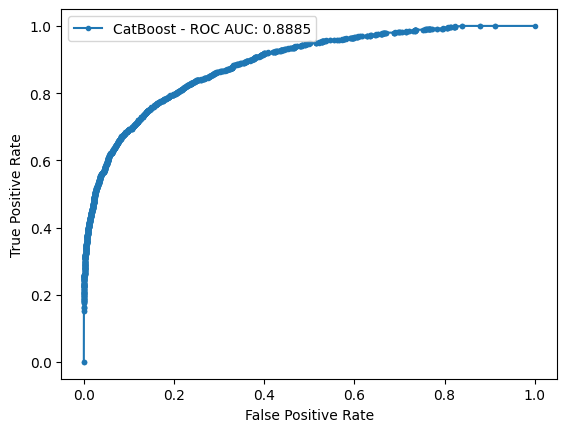

In [34]:
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import auc

fpr, tpr, _ = roc_curve(res["y_test"], res["y_pred"])
roc_auc = np.round(auc(fpr, tpr),4)
plt.plot(fpr, tpr, marker='.', label=f'CatBoost - ROC AUC: {roc_auc}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

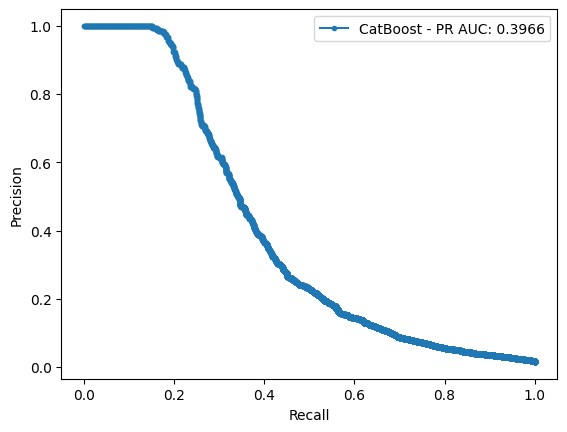

In [36]:
precision, recall, _ = precision_recall_curve(res["y_test"], res["y_pred"])
pr_auc = np.round(auc(recall, precision),4)
plt.plot(recall, precision, marker='.', label=f'CatBoost - PR AUC: {pr_auc}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()